<a href="https://colab.research.google.com/github/RajarshiRay25/House-Price-Prediction---ML---Regression/blob/main/House_Price_Prediction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dependancies

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# Using california house price datasets from sklearn

house_price_df = sklearn.datasets.fetch_california_housing()
house_price_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
# Dataframe conversion 

house_price_frame = pd.DataFrame(house_price_df.data,columns = house_price_df.feature_names)
house_price_frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Price Dataframe + Complete dataset

house_price_frame["price"] = house_price_df.target

In [5]:
# Full dataframe

house_price_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset Information

In [6]:
# Contents in dataset

dir(house_price_df)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [7]:
# Description of dataset and labels

house_price_df.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [8]:
# Price values

house_price_df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
# Description

house_price_frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# Information

house_price_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# check null values

house_price_frame.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

## Correlation Matrix to check relation

In [12]:
df_correlation = house_price_frame.corr()

<AxesSubplot:>

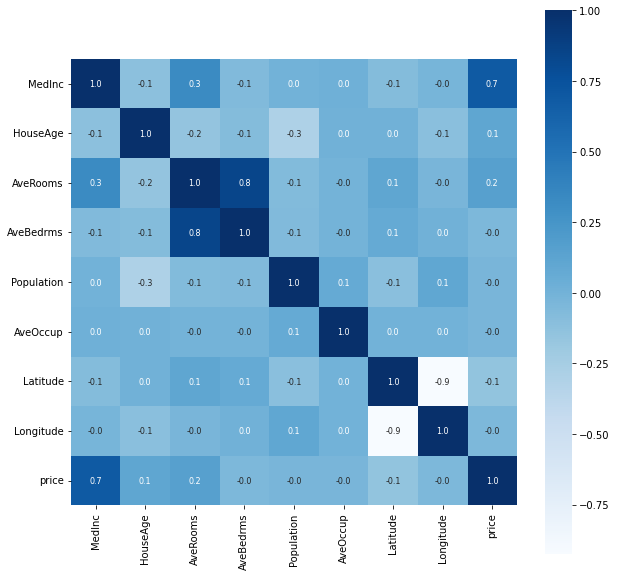

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df_correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## Removing Outliers


Text(0, 0.5, 'Avg Rooms')

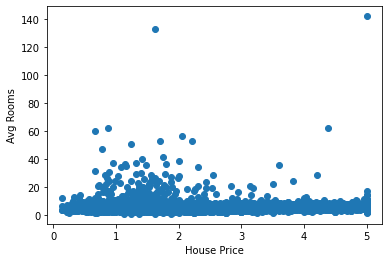

In [14]:
plt.scatter(house_price_frame['price'],house_price_frame['AveRooms'])
plt.xlabel('House Price')
plt.ylabel('Avg Rooms')

Text(0, 0.5, 'Avg Rooms')

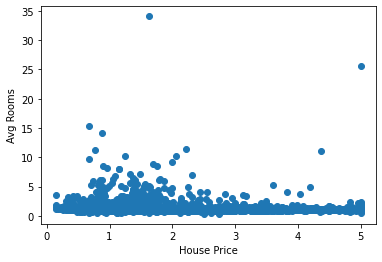

In [15]:
plt.scatter(house_price_frame['price'],house_price_frame['AveBedrms'])
plt.xlabel('House Price')
plt.ylabel('Avg Rooms')

Text(0.5, 0, 'Avg Rooms')

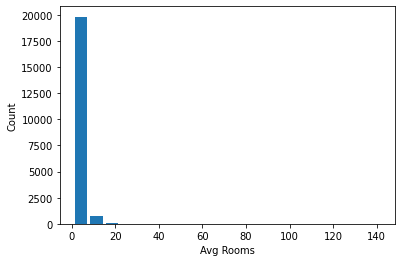

In [27]:
plt.hist(house_price_frame['AveRooms'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Avg Rooms')

Text(0.5, 0, 'Avg BedRooms')

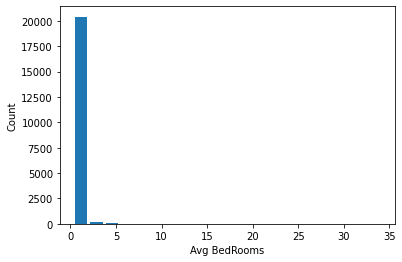

In [17]:
plt.hist(house_price_frame['AveBedrms'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Avg BedRooms')

Text(0.5, 0, 'Avg Occupants')

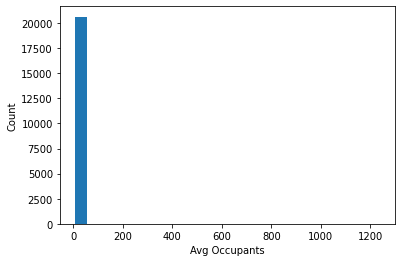

In [18]:
plt.hist(house_price_frame['AveOccup'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Avg Occupants')

Text(0.5, 0, 'Income')

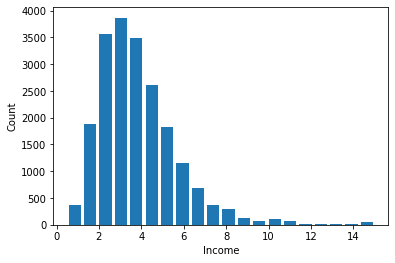

In [52]:
plt.hist(house_price_frame['MedInc'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Income')

## Outliers Removal with Statistics
---
#####Process the following


1.   Average Rooms - AveRooms
2.   Average Bedrooms - AveBedrms
3.   Average Occupancy - AveOccup





In [19]:
# AveRooms

In [20]:
house_price_frame['AveRooms'].max()

141.9090909090909

In [21]:
mean_rooms = house_price_frame['AveRooms'].mean()
mean_rooms

5.428999742190376

In [22]:
std_rooms = house_price_frame['AveRooms'].std()
std_rooms

2.4741731394243187

In [23]:
# Create limits using std and mean

max_limit = mean_rooms + 3*std_rooms
min_limit = mean_rooms - 3*std_rooms

print(f"Max Limit rooms : {max_limit}")
print(f"Min Limit rooms : {min_limit}")

Max Limit rooms : 12.851519160463333
Min Limit rooms : -1.9935196760825802


In [24]:
house_price_frame[(house_price_frame['AveRooms'] > max_limit) | (house_price_frame['AveRooms'] < min_limit) ]    # we have to remove them

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.406
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54,0.675
1233,3.7500,10.0,16.847534,3.237668,546.0,2.448430,38.23,-120.34,1.214
1234,4.4063,13.0,28.757282,5.300971,252.0,2.446602,38.26,-120.33,1.558
1235,2.9821,17.0,13.473039,2.588235,997.0,2.443627,38.25,-120.34,1.115
...,...,...,...,...,...,...,...,...,...
19976,3.1250,10.0,21.095238,5.285714,48.0,2.285714,36.19,-118.37,0.713
19977,2.3937,20.0,18.793522,5.263158,658.0,2.663968,35.82,-118.70,0.821
20093,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12,0.889
20094,2.1250,26.0,37.063492,7.185185,416.0,2.201058,38.19,-120.03,1.325


In [26]:
house_price_df1 = house_price_frame[(house_price_frame['AveRooms'] < max_limit) & (house_price_frame['AveRooms'] > min_limit) ] 
house_price_df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Text(0.5, 0, 'Avg Rooms')

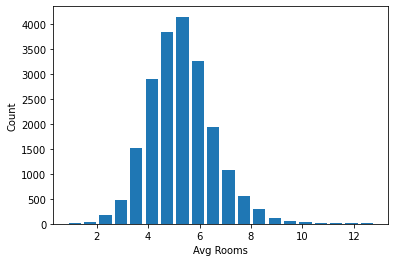

In [28]:
plt.hist(house_price_df1['AveRooms'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Avg Rooms')

In [ ]:
# AveBedrms

In [29]:
house_price_df1['AveBedrms'].max()

3.716417910447761

In [30]:
house_price_df1['AveBedrms'].min()

0.3333333333333333

In [31]:
mean_bedrooms = house_price_df1['AveBedrms'].mean()
mean_bedrooms

1.0708178740171457

In [32]:
std_bedrooms = house_price_df1['AveBedrms'].std()
std_bedrooms

0.14943910604465144

In [33]:
# Create limits using std and mean

max_val = mean_bedrooms + 3*std_bedrooms
min_val = mean_bedrooms - 3*std_bedrooms

print(f"Max Bedrooms : {max_val}")
print(f"Min Bedrooms : {min_val}")

Max Bedrooms : 1.5191351921511
Min Bedrooms : 0.6225005558831913


In [34]:
house_price_df1[(house_price_df1['AveBedrms'] > max_val) | (house_price_df1['AveBedrms'] < min_val) ]    # we have to remove them

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
62,0.9011,50.0,6.229508,1.557377,377.0,3.090164,37.81,-122.29,0.861
67,2.6094,52.0,6.986395,1.659864,492.0,3.346939,37.80,-122.29,0.813
73,0.4999,46.0,1.714286,0.571429,18.0,2.571429,37.81,-122.29,0.675
343,1.9167,36.0,7.506667,1.753333,482.0,3.213333,37.75,-122.19,0.828
710,2.4196,26.0,8.518248,2.700730,253.0,1.846715,37.68,-122.08,2.750
...,...,...,...,...,...,...,...,...,...
20122,3.3438,19.0,6.963768,1.579710,479.0,3.471014,34.70,-119.31,1.563
20123,2.2222,10.0,5.942857,1.571429,436.0,6.228571,34.62,-119.06,2.625
20248,8.0000,28.0,2.888889,0.333333,29.0,3.222222,34.25,-119.23,2.750
20302,4.3427,15.0,6.969843,1.550060,1722.0,2.077201,34.12,-119.21,3.058


In [35]:
house_price_df2 = house_price_df1[(house_price_df1['AveBedrms'] < max_val) & (house_price_df1['AveBedrms'] > min_val) ]  
house_price_df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Text(0.5, 0, 'Avg BedRooms')

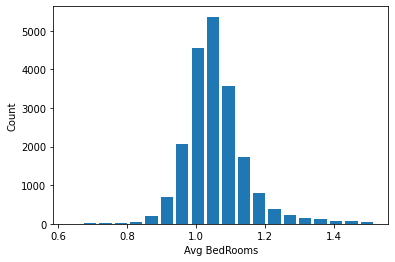

In [37]:
plt.hist(house_price_df2['AveBedrms'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Avg BedRooms')

In [38]:
# AveOccup

In [39]:
house_price_df2['AveOccup'].max()

1243.3333333333333

In [40]:
house_price_df2['AveOccup'].min()

0.75

In [41]:
mean_occup = house_price_df2['AveOccup'].mean()
mean_occup

3.0816551084374906

In [42]:
std_occup = house_price_df2['AveOccup'].std()
std_occup

10.510617354885746

In [43]:
# Create limits using std and mean

max_occ = mean_occup + 3*std_occup
min_occ = mean_occup - 3*std_occup

print(f"Max Occupancy : {max_occ}")
print(f"Min Occupancy : {min_occ}")

Max Occupancy : 34.613507173094725
Min Occupancy : -28.450196956219745


In [44]:
house_price_df2[(house_price_df2['AveOccup'] > max_val) | (house_price_df2['AveOccup'] < min_val) ]    # we have to remove them

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
house_price_df2.drop(['AveOccup','Latitude','Longitude'],axis='columns')   # Final dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,price
0,8.3252,41.0,6.984127,1.023810,322.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,0.847


In [53]:
#Medincome

In [54]:
house_price_df2['MedInc'].max()

15.0001

In [55]:
house_price_df2['MedInc'].min()

0.4999

In [56]:
mean_inc = house_price_df2['MedInc'].mean()
mean_inc

3.8863879678348057

In [57]:
std_inc = house_price_df2['MedInc'].std()
std_inc

1.9019619668948928

In [58]:
# Create limits using std and mean

max_inc = mean_inc + 3*std_inc
min_inc = mean_inc - 3*std_inc

print(f"Max Income : {max_inc}")
print(f"Min Income : {min_inc}")

Max Income : 9.592273868519484
Min Income : -1.8194979328498726


In [59]:
house_price_df2[(house_price_df2['MedInc'] > max_inc) | (house_price_df2['MedInc'] < min_inc) ]    # we have to remove them

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.92600
409,10.0825,52.0,8.209016,1.024590,658.0,2.696721,37.90,-122.28,3.97000
510,11.8603,39.0,7.911111,0.984127,808.0,2.565079,37.82,-122.22,5.00001
511,13.4990,42.0,8.928358,1.000000,1018.0,3.038806,37.82,-122.22,5.00001
512,12.2138,52.0,9.210227,1.039773,1001.0,2.843750,37.82,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20376,10.2614,16.0,6.421277,0.919149,578.0,2.459574,34.16,-118.86,4.10800
20380,10.1597,16.0,7.606936,1.121387,450.0,2.601156,34.14,-118.83,5.00001
20389,10.0595,26.0,8.692308,1.076923,573.0,3.148352,34.19,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001


In [60]:
house_price_df3 = house_price_df2[(house_price_df2['MedInc'] < max_inc) & (house_price_df2['MedInc'] > min_inc) ]  
house_price_df3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Text(0.5, 0, 'Income')

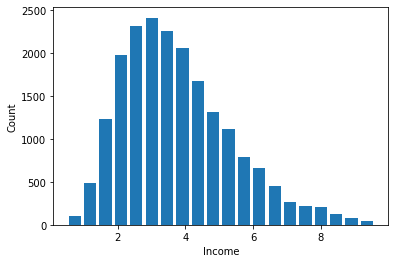

In [61]:
plt.hist(house_price_df3['MedInc'],bins=20,rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('Income')

##Dataframe Finalisation

In [68]:
house_price_df3.drop(['AveOccup','Latitude','Longitude'],axis='columns',inplace=True)   # Final dataset

<ipython-input-68-473b15306446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_df3.drop(['AveOccup','Latitude','Longitude'],axis='columns',inplace=True)   # Final dataset


In [69]:
work_df = house_price_df3   # Copy the dataframe

In [71]:
work_df  # we will work with this

,MedInc,HouseAge,AveRooms,AveBedrms,Population,price
0,8.3252,41.0,6.984127,1.023810,322.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,0.847


## Create train-test data + Model

In [72]:
work_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,price
0,8.3252,41.0,6.984127,1.023810,322.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,3.422


In [74]:
X = work_df.drop(['price'],axis='columns')
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,8.3252,41.0,6.984127,1.023810,322.0
1,8.3014,21.0,6.238137,0.971880,2401.0
2,7.2574,52.0,8.288136,1.073446,496.0
3,5.6431,52.0,5.817352,1.073059,558.0
4,3.8462,52.0,6.281853,1.081081,565.0
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0
20636,2.5568,18.0,6.114035,1.315789,356.0
20637,1.7000,17.0,5.205543,1.120092,1007.0
20638,1.8672,18.0,5.329513,1.171920,741.0


In [76]:
y = work_df.price
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 19810, dtype: float64

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled

array([[-0.37148107,  1.05235666, -1.32608433,  1.43557731,  0.00374973],
       [ 1.41853795, -0.78029289, -0.31949978,  3.21092079, -1.01886657],
       [ 2.88004416, -0.8599733 ,  2.70556962, -0.6411806 , -0.36078188],
       ...,
       [ 0.42771997, -0.3022104 ,  0.98244899, -0.3886349 , -0.45717244],
       [ 1.40387941, -0.54125164,  1.0466989 , -1.19245306,  0.45415656],
       [ 0.35684965,  0.17587209, -0.3204336 , -0.20322334, -0.26176247]])

In [80]:
y_train

4398     1.820
1731     1.100
1653     3.536
7321     1.618
6550     1.581
         ...  
3927     2.403
13026    1.458
1673     2.037
6321     3.249
6935     1.495
Name: price, Length: 15848, dtype: float64

In [128]:
model = XGBRegressor(n_estimators=100)

In [129]:
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [130]:
model.score(X_train_scaled,y_train)

0.7740563427696588

In [115]:
prediction_train_data = model.predict(X_train_scaled)

In [116]:
prediction_train_data

array([2.5164275, 1.4779737, 3.4860182, ..., 1.9885054, 2.770807 ,
       2.5679555], dtype=float32)

In [123]:
prediction_test_data = model.predict(X_test_scaled)

In [124]:
prediction_test_data

array([1.0295389 , 2.3090959 , 0.5884589 , ..., 0.71018815, 1.9782552 ,
       2.1925912 ], dtype=float32)

In [117]:
# R squared error

score_r_sq = metrics.r2_score(y_train,prediction_train_data)
score_r_sq

0.7740563427696588

In [127]:
# MSA

score_r_sq = metrics.mean_absolute_error(y_train,prediction_train_data)
score_r_sq

0.3860276892572515

In [92]:
# R squared error

score_r_sq_2 = metrics.r2_score(y_test,prediction_test_data)
score_r_sq_2

0.5761191524601936

In [93]:
# Mean abs error

score_MAE_2 = metrics.mean_absolute_error(y_test,prediction_test_data)
score_MAE_2

0.516797028665403

## Visualisation

Text(0.5, 1.0, 'Original Price vs Prediction on original price')

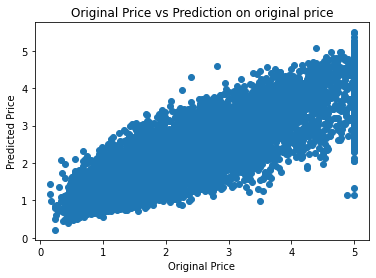

In [119]:
plt.scatter(y_train,prediction_train_data)
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs Prediction on original price')

Text(0.5, 1.0, 'Original Price vs Prediction on Test price')

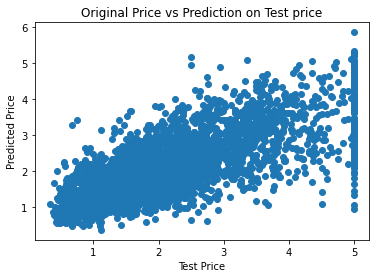

In [96]:
plt.scatter(y_test,prediction_test_data)
plt.xlabel('Test Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs Prediction on Test price')

In [97]:
from scipy import stats

In [100]:
# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(y_train,prediction_train_data)

In [101]:
# Print the equation of the line
print("y = {:.2f}x + {:.2f}".format(slope, intercept))

y = 0.72x + 0.56


Text(0.5, 1.0, 'Original Price vs Prediction on original price')

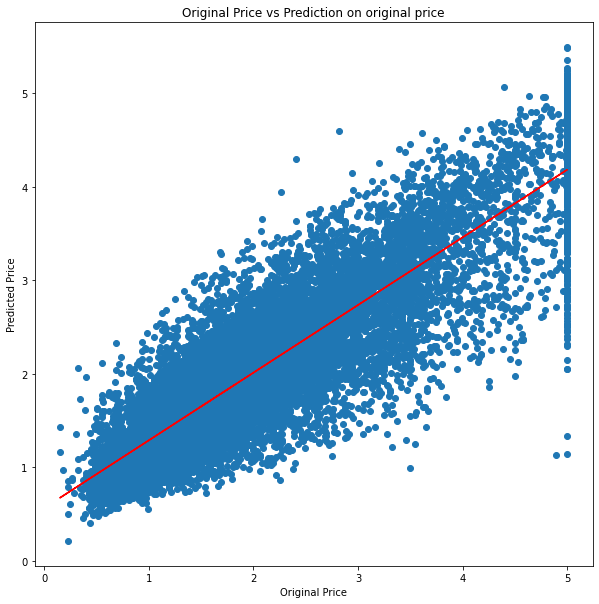

In [121]:
# Add the line to the plot + visualise prediction on train data

plt.figure(figsize=(10,10))
plt.scatter(y_train,prediction_train_data)
plt.plot(y_train, slope * y_train + intercept,color='red')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs Prediction on original price')

Text(0.5, 1.0, 'Original Price vs Prediction on Test price')

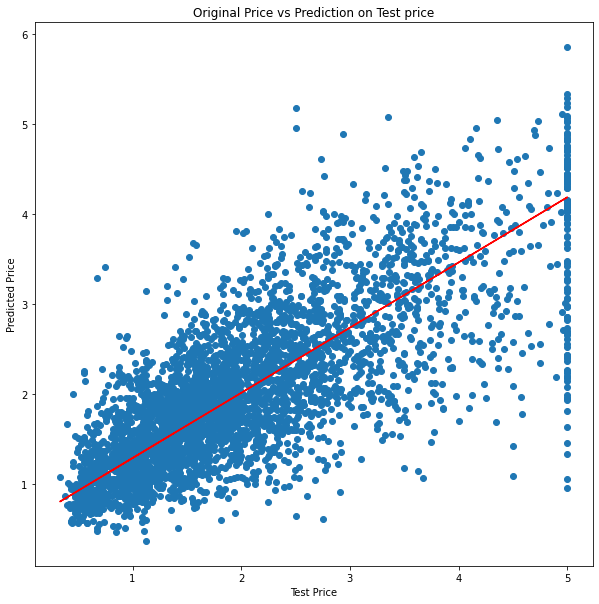

In [125]:
# Add the line to the plot + visualise prediction on test data

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction_test_data)
plt.plot(y_test, slope * y_test + intercept,color='red')
plt.xlabel('Test Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs Prediction on Test price')